In [1]:
import os
import astropy
import numpy as np
from astropy.table import Table
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
directory = r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs\\"
final_rcf_table = Table.from_pandas(pd.read_hdf("C:/Users/20xha/Documents/Caltech/Research/final_rcf_table.h5"))
SEDM_ML_sample = Table.read("C:/Users/20xha/Documents/Caltech/Research/SEDM_ML_sample.ascii", format = "ascii")
run_list = os.listdir(r"C:\Users\20xha\Documents\Caltech\Research\SNID\snid_outputs/")[3::]

In [3]:
Table_List_Numpy = np.load(r"C:\Users\20xha\Documents\Caltech\Research\SNID_results.npy", allow_pickle=True)

In [19]:
len(Table_List_Numpy)

585

In [4]:
Max = 0
Min = 100
for i in Table_List_Numpy:
    Temp_Max = np.max(i[1]["rlap"])
    Temp_Min = np.min(i[1]["rlap"])
    if(Temp_Max > Max):
        Max = Temp_Max
    if(Temp_Min < Min):
        Min = Temp_Min

In [5]:
ranges = np.linspace(Max, Min, 1000)

In [6]:
ResultsTable_List_rlap = []
count = 0

for i in ranges:
    ResultsTable = Table(
                    names=("ZTF_Name", "Closest"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        if(np.max(j[1]["rlap"]) > i):
            row.append(j[1][0]["type"])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_rlap.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

100
200
300
400
500
600
700
800
900
1000


In [7]:
counters_rlap = [] 
for i in ResultsTable_List_rlap:
    counter = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    incorrect = []
    for j in JoinedResults:
        correct_id = j["sn_type"]

        if (correct_id in j["Closest"]):
            counter += 1
        else:
            incorrect.append([j["ZTF_Name"], correct_id, j["Closest"]])
    counters_rlap.append([i[0],counter,len(JoinedResults), incorrect])

In [8]:
counters_rlap = np.asarray(counters_rlap)

Text(0, 0.5, 'accuracy')

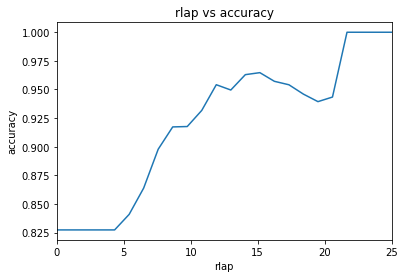

In [9]:
plt.plot(counters_rlap[:,0], counters_rlap[:,1]/counters_rlap[:,2])
plt.xlim(0, 25)
plt.title("rlap vs accuracy")
plt.xlabel("rlap")
plt.ylabel("accuracy")

In [10]:
low_rlap = np.where(counters_rlap[:,0] < 20)

In [11]:
np.argmax(counters_rlap[low_rlap][:,1]/counters_rlap[low_rlap][:,2])

4

In [12]:
counters_rlap[low_rlap][4]

array([15.160820820820732, 164, 170,
       list([['ZTF18aavskep', 'IIn', 'AGN'], ['ZTF18abclfee', 'Ia-02cx', 'Ia-91T'], ['ZTF18abtogdl', 'Ia', 'II-pec'], ['ZTF18abtswjk', 'IIn', 'Gal'], ['ZTF18acbwaxk', 'II-87A', 'IIP'], ['ZTF18acxgoki', 'Ic', 'Gal']])],
      dtype=object)

In [13]:
counters_rlap

array([[998.8154854854855, 1, 1, list([])],
       [997.7309709709709, 1, 1, list([])],
       [996.6464564564565, 1, 1, list([])],
       ...,
       [-81.36097097097093, 484, 585,
        list([['ZTF18aagrdcs', 'Ib', 'Ia-91T'], ['ZTF18aapgrxo', 'SLSN-I', 'Ia-norm'], ['ZTF18aapictz', 'Ia-91T', 'Ic-norm'], ['ZTF18aapifti', 'II', 'Ia-pec'], ['ZTF18aaqehoc', 'Ia', 'Ic-broad'], ['ZTF18aaqkdwf', 'ambiguous', 'Ic-norm'], ['ZTF18aaqkoyr', 'II', 'Ib-norm'], ['ZTF18aarasof', 'IIn', 'AGN'], ['ZTF18aarcchg', 'ambiguous', 'Gal'], ['ZTF18aasxvsg', 'IIb', 'Ia-csm'], ['ZTF18aauxzle', 'II', 'Ic-norm'], ['ZTF18aavskep', 'IIn', 'AGN'], ['ZTF18aaxdrjn', 'Ia', 'Ic-norm'], ['ZTF18aaxkqgy', 'II', 'Ia-91T'], ['ZTF18aaxmixe', 'Ia', 'Ic-norm'], ['ZTF18aaxnqjb', 'II', 'Gal'], ['ZTF18aaxxfgs', 'IIn', 'IIP'], ['ZTF18aaygwqd', 'Ib', 'Gal'], ['ZTF18abauprj', 'Ia-91T', 'Ia-pec'], ['ZTF18abcfdzu', 'SLSN-II', 'Ic-norm'], ['ZTF18abclfee', 'Ia-02cx', 'Ia-91T'], ['ZTF18abcsgvj', 'Ia', 'IIP'], ['ZTF18abcyilc', 'Ia-02cx',

In [14]:
ResultsTable_List_top15 = []
count = 0

for i in range(0,16):
    ResultsTable = Table(
                    names=("ZTF_Name", "Top15"
                    ),
                    meta={"name": "Spectrum Results after SNID"},
                    dtype=("U64", "U64"
                          )
                    )
    for j in Table_List_Numpy:
        row = []
        row.append(j[0])
        Top15 = j[1][0:15]
        c = Counter(Top15["type"])
        if(c.most_common()[0][1] >= i):
            row.append(c.most_common()[0][0])
            ResultsTable.add_row(row)
    
    count += 1
    if(len(ResultsTable) != 0):
        ResultsTable_List_top15.append([i,ResultsTable])
    if(count% 100 == 0):
        print(count)

In [15]:
counters_number = [] 
for i in ResultsTable_List_top15:
    counter = 0
    JoinedResults = astropy.table.join(i[1], final_rcf_table)
    for j in JoinedResults:
        correct_id = j["sn_type"]

        if (correct_id in j["Top15"]):
            counter += 1
        else:
            if(i[0] == 15):
                print(j["ZTF_Name"], correct_id, j["Top15"])
    counters_number.append([i[0],counter,len(JoinedResults)])

ZTF18abdpvnd Ia-SC Ia-norm
ZTF18abvgjft II Ia-norm
ZTF18acbvcmw Ia IIn


In [16]:
counters_number = np.asarray(counters_number)

Text(0, 0.5, 'accuracy')

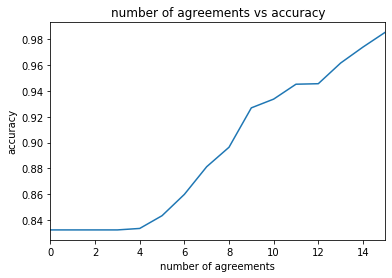

In [17]:
plt.plot(counters_number[:,0], counters_number[:,1]/counters_number[:,2])
plt.xlim(0, 15)
plt.title("number of agreements vs accuracy")
plt.xlabel("number of agreements")
plt.ylabel("accuracy")

In [18]:
counters_number[np.where(counters_number[:,1] < counters_number[:,2])]

array([[  0, 487, 585],
       [  1, 487, 585],
       [  2, 487, 585],
       [  3, 487, 585],
       [  4, 486, 583],
       [  5, 485, 575],
       [  6, 479, 557],
       [  7, 468, 531],
       [  8, 450, 502],
       [  9, 431, 465],
       [ 10, 394, 422],
       [ 11, 362, 383],
       [ 12, 330, 349],
       [ 13, 300, 312],
       [ 14, 261, 268],
       [ 15, 202, 205]])